In [2]:
import pandas as pd 
import fastparquet #make sure that this is installed in your anaconda environment

#loads the file into the label "data"
data=pd.read_parquet('1053600674.parquet', engine='fastparquet')

In [3]:
list(data) #list of all of the features, we can use source, plate, and well to correlate with treatment label


['Metadata_Source',
 'Metadata_Plate',
 'Metadata_Well',
 'Cells_AreaShape_Area',
 'Cells_AreaShape_BoundingBoxArea',
 'Cells_AreaShape_BoundingBoxMaximum_X',
 'Cells_AreaShape_BoundingBoxMaximum_Y',
 'Cells_AreaShape_BoundingBoxMinimum_X',
 'Cells_AreaShape_BoundingBoxMinimum_Y',
 'Cells_AreaShape_Center_X',
 'Cells_AreaShape_Center_Y',
 'Cells_AreaShape_Compactness',
 'Cells_AreaShape_Eccentricity',
 'Cells_AreaShape_EquivalentDiameter',
 'Cells_AreaShape_EulerNumber',
 'Cells_AreaShape_Extent',
 'Cells_AreaShape_FormFactor',
 'Cells_AreaShape_MajorAxisLength',
 'Cells_AreaShape_MaxFeretDiameter',
 'Cells_AreaShape_MaximumRadius',
 'Cells_AreaShape_MeanRadius',
 'Cells_AreaShape_MedianRadius',
 'Cells_AreaShape_MinFeretDiameter',
 'Cells_AreaShape_MinorAxisLength',
 'Cells_AreaShape_Orientation',
 'Cells_AreaShape_Perimeter',
 'Cells_AreaShape_Solidity',
 'Cells_AreaShape_Zernike_0_0',
 'Cells_AreaShape_Zernike_1_1',
 'Cells_AreaShape_Zernike_2_0',
 'Cells_AreaShape_Zernike_2_2',
 'C

In [4]:
data.head #using .head shows some example data that goes with each of the headings

<bound method NDFrame.head of     Metadata_Source Metadata_Plate Metadata_Well  Cells_AreaShape_Area  \
0          source_2     1053600674           A01           3172.857900   
1          source_2     1053600674           A02           3277.791089   
2          source_2     1053600674           A03           3134.097889   
3          source_2     1053600674           A04           3336.474747   
4          source_2     1053600674           A05           3087.471417   
..              ...            ...           ...                   ...   
378        source_2     1053600674           P20           3225.121245   
379        source_2     1053600674           P21           2976.655488   
380        source_2     1053600674           P22           3118.853634   
381        source_2     1053600674           P23           3088.950000   
382        source_2     1053600674           P24           3388.086529   

     Cells_AreaShape_BoundingBoxArea  Cells_AreaShape_BoundingBoxMaximum_X  \
0  

(array([ 37., 232.,  69.,  26.,   9.,   4.,   2.,   3.,   0.,   1.]),
 array([0.39407695, 0.61752585, 0.84097476, 1.06442366, 1.28787257,
        1.51132147, 1.73477038, 1.95821928, 2.18166819, 2.40511709,
        2.628566  ]),
 <BarContainer object of 10 artists>)

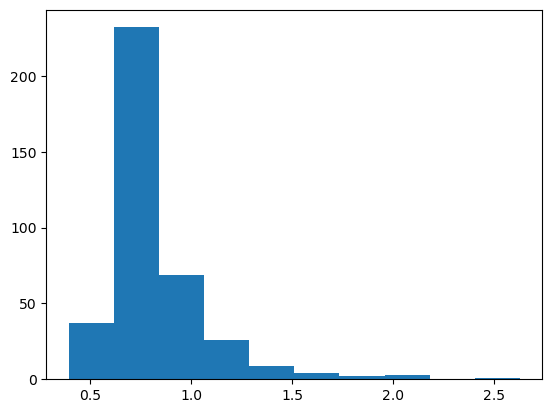

In [5]:
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt

mean_nuc_text_var_RNA=stat.mean(data.Nuclei_Texture_Variance_RNA_10_02_256) #using statistics toolbox to get key features

plt.hist(data.Nuclei_Texture_Variance_RNA_10_02_256) #using matplotlib to create plots

In [6]:
test_location=data.Nuclei_Texture_Variance_RNA_10_02_256

<Axes: >

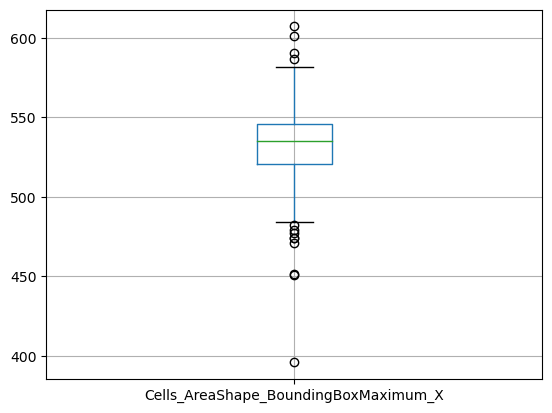

In [7]:
headers=data.columns.values #putting column headers into a string array so we can use numbers to index them

data.boxplot(column=[headers[5]], return_type='axes')

<Axes: >

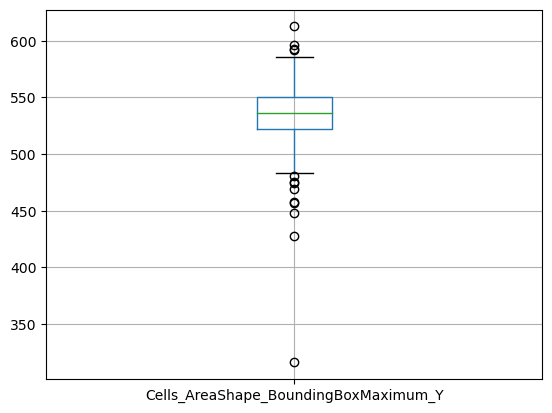

In [8]:
data.boxplot(column=[headers[6]], return_type='axes')

<Axes: >

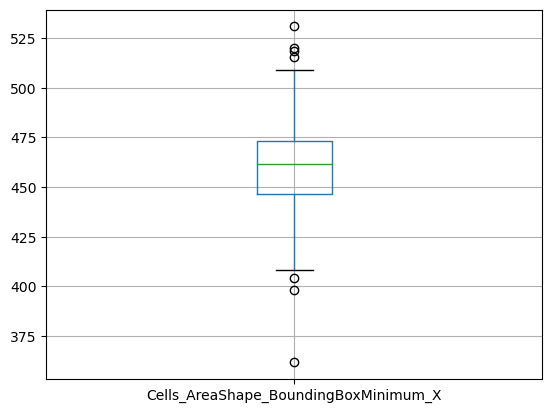

In [9]:
data.boxplot(column=[headers[7]], return_type='axes')

<Axes: >

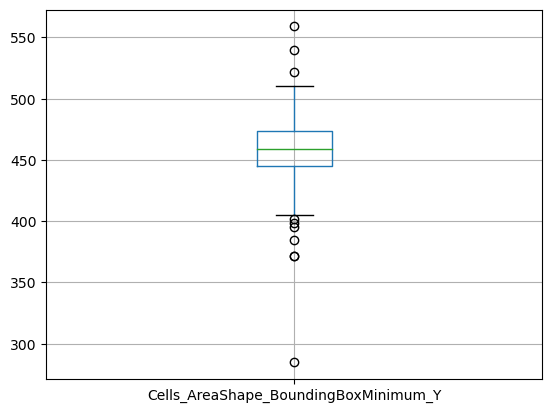

In [10]:
data.boxplot(column=[headers[8]], return_type='axes')

In [17]:
print(data[headers[5]]) #showing just one column at a time

0      563.463415
1      513.389109
2      545.170825
3      503.652525
4      530.991715
          ...    
378    562.164163
379    489.652439
380    540.158649
381    548.907143
382    539.117011
Name: Cells_AreaShape_BoundingBoxMaximum_X, Length: 383, dtype: float64


In [20]:
corr=data[headers[5]]. corr(data[headers[6]]) #correlation coefficient between minimum and maximum X values

print(corr)

0.17747389195533284


0.17747389195533284
